<a href="https://colab.research.google.com/github/Manireddy69/DL/blob/main/bouston%2Bhouse_data_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
train_data.shape

(404, 13)

In [6]:
train_targets.shape

(404,)

In [16]:
print("maximum price for the target is", max(train_targets),
      "\nminimum price for the target is",min(train_targets))

maximum price for the target is 50.0 
minimum price for the target is 5.0


In [17]:
#normalize the data
mean = train_data.mean(axis = 0)
train_data -= mean
std = train_data.std(axis = 0)
train_data  /= std
test_data -= mean
test_data /= std

In [19]:
from keras import models, layers

In [27]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation = 'relu', input_shape = (train_data.shape[1],)))
  model.add(layers.Dense(64, activation = 'relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer= 'rmsprop', loss ='mse', metrics = ['mae'])
  return model

In [28]:
import numpy as np

k = 4 # 4-fold cross validation
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
  print("preprocessing fold #", i)
  val_data = train_data[i*num_val_samples : (i +1)* num_val_samples]
  val_targets = train_targets[i * num_val_samples : (i + 1)* num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[: i* num_val_samples],
       train_data[(i + 1) * num_val_samples:]],axis= 0
  )
  partial_train_targets = np.concatenate(
      [train_targets[: i *num_val_samples],
       train_targets[(i+1)* num_val_samples:]],axis = 0
  )
  model = build_model()
  model.fit(partial_train_data, partial_train_targets,epochs = num_epochs,
            batch_size = 1, verbose = 0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
  all_scores.append(val_mae)

preprocessing fold # 0
preprocessing fold # 1
preprocessing fold # 2
preprocessing fold # 3


In [31]:
all_scores

[2.163320302963257, 2.684814691543579, 2.566237449645996, 2.4525954723358154]

In [33]:
np.mean(all_scores)

np.float64(2.466741979122162)

In [36]:
#save the validation logs at each fold
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print("preprocessing fold #", i)
  val_data = train_data[i*num_val_samples : (i +1)* num_val_samples]
  val_targets = train_targets[i * num_val_samples : (i + 1)* num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[: i* num_val_samples],
       train_data[(i + 1) * num_val_samples:]],axis= 0
  )
  partial_train_targets = np.concatenate(
      [train_targets[: i *num_val_samples],
       train_targets[(i+1)* num_val_samples:]],axis = 0
  )
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets),
                      epochs = num_epochs, batch_size = 1, verbose = 0)
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

preprocessing fold # 0
preprocessing fold # 1
preprocessing fold # 2
preprocessing fold # 3


In [37]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories])for i in range(num_epochs)]

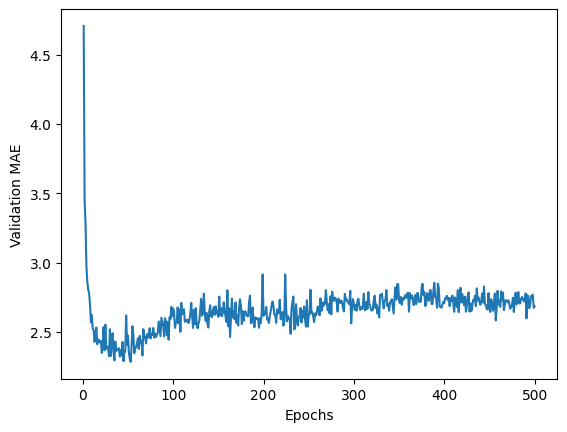

In [38]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

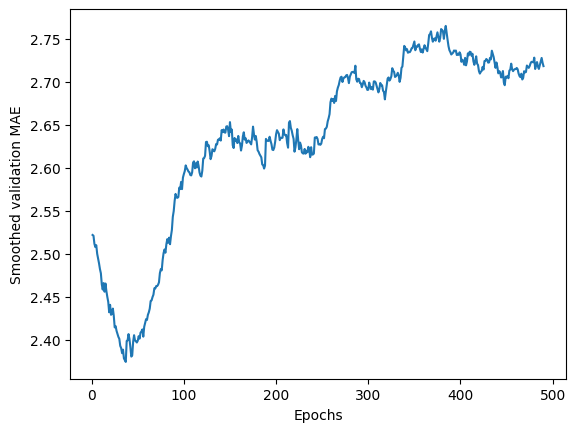

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 13.0560 - mae: 2.4674
Test MAE: 2.6950812339782715


In [39]:
import matplotlib.pyplot as plt
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Smoothed validation MAE')
plt.show()

model = build_model()
model.fit(train_data, train_targets,
          epochs = 80, batch_size = 16, verbose = 0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

print("Test MAE:", test_mae_score)

In [41]:
from google.colab import output
output.enable_custom_widget_manager()